### Some feature engineering on cleaned supply chain and esg data

In [44]:
# Feature engineering on Supply chain dataset

import pandas as pd
import numpy as np

supply_df = pd.read_csv(r'C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\cleaned_data\supply_chain_cleaned.csv')
supply_df.head()


,Unnamed: 0,Date,Supplier_ID,Supplier_Name,Sector,SKU,Product_Type,Price,Availability,Availability_Pct,...,Shipping_carriers,Shipping_costs,Location,Manufacturing_lead_time,Production_volumes,Manufacturing_costs,Inspection_results,Defect_rates_pct,Transportation_modes,Routes
0,0,2024-02-25,S0144,SUPP_U_144,Utilities,NaN,NaN,231.965,NaN,NaN,...,CarrierA,678.290,NaN,NaN,NaN,815645.000,NaN,NaN,Intermodal,Urban Corridor
1,1,2024-04-13,S0294,SUPP_FS_294,Financial Services,NaN,NaN,34.550,NaN,NaN,...,CarrierA,1142.240,NaN,NaN,NaN,185964.100,NaN,NaN,Intermodal,Urban Corridor
2,2,2024-05-12,S0226,SUPP_CS_226,Communication Services,NaN,NaN,34.980,NaN,NaN,...,CarrierA,1215.730,NaN,NaN,NaN,189833.260,NaN,NaN,Intermodal,Urban Corridor
3,3,2024-11-17,S0176,SUPP_CS_176,Communication Services,NaN,NaN,34.980,NaN,NaN,...,CarrierA,1215.730,NaN,NaN,NaN,189833.260,NaN,NaN,Intermodal,Urban Corridor
4,4,2024-04-17,S0264,SUPP_CD_264,Consumer Defensive,NaN,NaN,35.175,NaN,NaN,...,CarrierA,1141.245,NaN,NaN,NaN,187762.535,NaN,NaN,Intermodal,Urban Corridor


In [3]:
supply_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2500 non-null   int64  
 1   Date                     2500 non-null   object 
 2   Supplier_ID              2500 non-null   object 
 3   Supplier_Name            2500 non-null   object 
 4   Sector                   2500 non-null   object 
 5   SKU                      2450 non-null   object 
 6   Product_Type             2475 non-null   object 
 7   Price                    2500 non-null   float64
 8   Availability             2450 non-null   object 
 9   Availability_Pct         2425 non-null   float64
 10  Number_of_products_sold  2450 non-null   float64
 11  Revenue_generated        2400 non-null   float64
 12  Customer_demographics    2500 non-null   object 
 13  Stock_levels             2500 non-null   float64
 14  Lead_times              

In [45]:
# Delivery performance
# Delivery Realiability tell us suppliers delivers on time
supply_df['Delivery_Reliabiliy'] = supply_df['Lead_times'] /supply_df['Shipping_times']

# Binary indicator for consistent delays. 
supply_df['OnTime_Flag'] = (supply_df['Shipping_times'] <=supply_df['Lead_times']).astype(int)

supply_df['OnTime_Flag'].value_counts()

OnTime_Flag
1    2488
0      12
Name: count, dtype: int64

In [5]:
# Supplier Efficiency
# high cost per = inefficient = financial Risk
supply_df['Cost_per_unit'] = supply_df['Manufacturing_costs']/supply_df['Production_volumes']

# Tells us if supplier generates enought value
supply_df['Revenue_per_unit'] = supply_df['Revenue_generated']/supply_df['Order_quantities']


In [12]:
# Operational Risk
# Direct risk feacture - if supplier often cant meet demand , its supply disruption
supply_df['Stockout_Risk'] = (supply_df['Order_quantities'] - supply_df['Stock_levels'])/supply_df['Order_quantities']
supply_df['Stockout_Risk'] = supply_df['Stockout_Risk'].clip(lower=0) # avoid negatives


In [18]:
# inspection results have some missing values
supply_df['Inspection_results'].isna().mean()*100

supply_df['Inspection_results'] = supply_df['Inspection_results'].fillna(supply_df['Inspection_results'].mode)

supply_df['Inspection_results'] = supply_df['Inspection_results'].map({'Passed':1,'Failed':0})

supply_df['Inspection_failure_flag'] = (supply_df['Inspection_results']==0).astype(int)

In [19]:
# Financial features
supply_df['Profit_margin'] =(
    (supply_df['Revenue_generated'] - supply_df['Manufacturing_costs'] - supply_df['Shipping_costs'])
    /supply_df['Revenue_generated']
)

In [20]:
supply_df.to_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\cleaned_data\Supply_chain_Features.csv")

# Feature engineering on ESG datset

In [22]:
esg_df = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\cleaned_data\ESG_cleaned.csv")
esg_df.head()

,Unnamed: 0,Symbol,Name,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,0,ADANIENT,Adani Enterprises Ltd.,Energy,Metals & Mining,NaN,43.25,23.35,6.5,11.5,Unknown,2.0,NaN,Unknown
1,1,ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,Industrials,Services,NaN,12.60,3.60,5.6,3.4,High Controversy Level,4.0,6th percentile,Low
2,2,APOLLOHOSP,Apollo Hospitals Enterprise Ltd.,Healthcare,Healthcare,NaN,28.40,3.30,10.3,14.7,Unknown,3.0,NaN,Unknown
3,3,ASIANPAINT,Asian Paints Ltd.,Basic Materials,Consumer Durables,NaN,25.40,11.30,6.2,8.0,Low Controversy Level,1.0,51st percentile,Medium
4,4,AXISBANK,Axis Bank Ltd.,Financial Services,Financial Services,NaN,24.20,2.30,11.6,10.3,Significant Controversy Level,3.0,45th percentile,Medium


In [23]:
esg_df.isnull().sum()

Unnamed: 0                 0
Symbol                     0
Name                       0
Sector                     0
Industry                   0
Full Time Employees       50
Total ESG Risk score       0
Environment Risk Score     0
Governance Risk Score      0
Social Risk Score          0
Controversy Level          0
Controversy Score          0
ESG Risk Percentile       12
ESG Risk Level             0
dtype: int64

In [24]:
# Averge of Environmental and social risks - we use this 2 cause it contribute more in esg risk
esg_df['E_S_Avg'] = (esg_df['Environment Risk Score'] + esg_df['Social Risk Score'])/2


In [25]:
# Relative Governance Impact
esg_df['Governance_Impact'] = esg_df['Governance Risk Score']/esg_df['Total ESG Risk score']


In [26]:
# Encode ESG Risk Level
risk_mapping = {'Low':1,'Medium':2,'High':3,'Unknown':0}
esg_df['ESG_Risk_Level_Encoded'] = esg_df['ESG Risk Level'].map(risk_mapping)

In [27]:
# Sector-level Aggregation 
esg_sector = esg_df.groupby("Sector").agg({
    "Total ESG Risk score": ["mean", "std"],
    "Environment Risk Score": "mean",
    "Social Risk Score": "mean",
    "Governance Risk Score": "mean",
    "E_S_Avg": "mean",
    "Governance_Impact": "mean",
    "Controversy Score": "mean",
    "ESG_Risk_Level_Encoded": "mean"
}).reset_index()

esg_sector.columns = ['Sector'] + ["_".join(col).strip("_") for col in esg_sector.columns[1:]]


In [28]:
esg_df.head()

,Unnamed: 0,Symbol,Name,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level,E_S_Avg,Governance_Impact,ESG_Risk_Level_Encoded
0,0,ADANIENT,Adani Enterprises Ltd.,Energy,Metals & Mining,NaN,43.25,23.35,6.5,11.5,Unknown,2.0,NaN,Unknown,17.425,0.150289,0.0
1,1,ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,Industrials,Services,NaN,12.60,3.60,5.6,3.4,High Controversy Level,4.0,6th percentile,Low,3.500,0.444444,1.0
2,2,APOLLOHOSP,Apollo Hospitals Enterprise Ltd.,Healthcare,Healthcare,NaN,28.40,3.30,10.3,14.7,Unknown,3.0,NaN,Unknown,9.000,0.362676,0.0
3,3,ASIANPAINT,Asian Paints Ltd.,Basic Materials,Consumer Durables,NaN,25.40,11.30,6.2,8.0,Low Controversy Level,1.0,51st percentile,Medium,9.650,0.244094,2.0
4,4,AXISBANK,Axis Bank Ltd.,Financial Services,Financial Services,NaN,24.20,2.30,11.6,10.3,Significant Controversy Level,3.0,45th percentile,Medium,6.300,0.479339,2.0


In [33]:
esg_df.drop(columns="Unnamed: 0")

,Symbol,Name,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level,E_S_Avg,Governance_Impact,ESG_Risk_Level_Encoded
0,ADANIENT,Adani Enterprises Ltd.,Energy,Metals & Mining,NaN,43.25,23.35,6.50,11.50,Unknown,2.0,NaN,Unknown,17.425,0.150289,0.0
1,ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,Industrials,Services,NaN,12.60,3.60,5.60,3.40,High Controversy Level,4.0,6th percentile,Low,3.500,0.444444,1.0
2,APOLLOHOSP,Apollo Hospitals Enterprise Ltd.,Healthcare,Healthcare,NaN,28.40,3.30,10.30,14.70,Unknown,3.0,NaN,Unknown,9.000,0.362676,0.0
3,ASIANPAINT,Asian Paints Ltd.,Basic Materials,Consumer Durables,NaN,25.40,11.30,6.20,8.00,Low Controversy Level,1.0,51st percentile,Medium,9.650,0.244094,2.0
4,AXISBANK,Axis Bank Ltd.,Financial Services,Financial Services,NaN,24.20,2.30,11.60,10.30,Significant Controversy Level,3.0,45th percentile,Medium,6.300,0.479339,2.0
5,BAJAJ-AUTO,Bajaj Auto Ltd.,Consumer Cyclical,Automobile and Auto Components,NaN,17.00,4.20,6.70,6.10,Low Controversy Level,1.0,17th percentile,Low,5.150,0.394118,1.0
6,BAJFINANCE,Bajaj Finance Ltd.,Financial Services,Financial Services,NaN,25.35,2.15,12.35,10.85,Unknown,2.0,NaN,Unknown,6.500,0.487179,0.0
7,BAJAJFINSV,Bajaj Finserv Ltd.,Financial Services,Financial Services,NaN,26.50,1.90,13.30,11.40,Low Controversy Level,1.0,55th percentile,Medium,6.650,0.501887,2.0
8,BPCL,Bharat Petroleum Corporation Ltd.,Energy,Oil Gas & Consumable Fuels,NaN,37.80,21.40,6.70,9.70,Moderate Controversy Level,2.0,89th percentile,High,15.550,0.177249,3.0
9,BHARTIARTL,Bharti Airtel Ltd.,Communication Services,Telecommunication,NaN,19.50,3.20,8.40,7.90,Significant Controversy Level,3.0,26th percentile,Low,5.550,0.430769,1.0


In [34]:
esg_df.to_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\cleaned_data\ESG_features.csv")

## Merge three dataset
- supply chain with ESG on sector
- supply chain with geoplotical risk on data

In [69]:
ESG_sector = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\cleaned_data\ESG_features.csv")
supply_chain = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\cleaned_data\Supply_chain_Features.csv")
Geopolitical_risk = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\data\India_Geopolitical_Risk_Index.csv")

In [ ]:
# Merge supply chain + ESG (on sector)
merged_df = pd.merge(
    supply_chain,
    ESG_sector,
    on="Sector",
    how="left"
)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       488 non-null    object 
 1   GPR_Index  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [71]:

# # Merge with geopolotical risk
merged_df['Date']= pd.to_datetime(merged_df['Date'],errors='coerce')
Geopolitical_risk['Date'] = pd.to_datetime(Geopolitical_risk['Date'])

In [72]:
merged_df = pd.merge_asof(
    merged_df.sort_values('Date'),
    Geopolitical_risk.sort_values('Date'),
    on='Date',
    direction='backward'
)


In [74]:
merged_df.to_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\cleaned_data\Merged_data.csv")

# Unified EDA on Merged data


In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\cleaned_data\Merged_data.csv")

print("Shape",df.shape)
print("Columns",df.columns.tolist())
print("missing values",df.isnull().sum())

Shape (12585, 54)
Columns ['Unnamed: 0', 'Unnamed: 0.1_x', 'Unnamed: 0_x', 'Date', 'Supplier_ID', 'Supplier_Name', 'Sector', 'SKU', 'Product_Type', 'Price', 'Availability', 'Availability_Pct', 'Number_of_products_sold', 'Revenue_generated', 'Customer_demographics', 'Stock_levels', 'Lead_times', 'Order_quantities', 'Shipping_times', 'Shipping_carriers', 'Shipping_costs', 'Location', 'Manufacturing_lead_time', 'Production_volumes', 'Manufacturing_costs', 'Inspection_results', 'Defect_rates_pct', 'Transportation_modes', 'Routes', 'Delivery_Reliabiliy', 'OnTime_Flag', 'Cost_per_unit', 'Revenue_per_unit', 'Stockout_Risk', 'Inspection_failure_flag', 'Profit_margin', 'Unnamed: 0.1_y', 'Unnamed: 0_y', 'Symbol', 'Name', 'Industry', 'Full Time Employees', 'Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score', 'Controversy Level', 'Controversy Score', 'ESG Risk Percentile', 'ESG Risk Level', 'E_S_Avg', 'Governance_Impact', 'ESG_Risk_Level_Encoded', 'GPR_In

In [4]:
# Dropping some columns with high missing values and not important for prediction

df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1_x', 'Unnamed: 0_x','Unnamed: 0.1_y', 'Unnamed: 0_y','Inspection_results', 'Full Time Employees'],inplace=True)


In [5]:
# Imputing missing value of some features with median per sector
numeric_col = ['Revenue_generated','Order_quantities','Production_volumes','Defect_rates_pct']

for col in numeric_col:
    df[col] = df.groupby('Sector')[col].transform(lambda x:x.fillna(x.median))

In [6]:
df[numeric_col].isnull().sum()

Revenue_generated     0
Order_quantities      0
Production_volumes    0
Defect_rates_pct      0
dtype: int64

In [7]:
# imputing some categorical features with mode per sector

cat_cols = ['Product_Type','SKU','Location']
for col in cat_cols:
    df[col] = df.groupby('Sector')[col].transform(lambda x:x.fillna(x.mode()))

In [8]:
df['ESG_Risk_Level_Encoded'] = df.groupby('Sector')['ESG_Risk_Level_Encoded'].transform(lambda x:x.fillna(x.mode()))

In [9]:
df[df['ESG_Risk_Level_Encoded'].isnull()].head()

,Date,Supplier_ID,Supplier_Name,Sector,SKU,Product_Type,Price,Availability,Availability_Pct,Number_of_products_sold,...,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level,E_S_Avg,Governance_Impact,ESG_Risk_Level_Encoded,GPR_Index
10,2023-05-05,S0217,SUPP_BM_217,Basic Materials,SKU-44435,Product_D,35.98,In Stock,1.0,5226.0,...,12.8,11.2,Moderate Controversy Level,2.0,95th percentile,Severe,15.15,0.296984,NaN,10.29
20,2023-05-19,S0081,SUPP_BM_081,Basic Materials,SKU-30131,Product_A,32.25,In Stock,1.0,8227.0,...,12.8,11.2,Moderate Controversy Level,2.0,95th percentile,Severe,15.15,0.296984,NaN,10.29
22,2023-05-22,S0005,SUPP_E_005,Energy,SKU-40493,Product_E,515.36,In Stock,1.0,16650.0,...,6.2,10.6,Moderate Controversy Level,2.0,93rd percentile,Severe,17.40,0.151220,NaN,10.29
23,2023-05-22,S0005,SUPP_E_005,Energy,SKU-40493,Product_E,515.36,In Stock,1.0,16650.0,...,12.3,17.3,Severe Controversy Level,5.0,99th percentile,Severe,19.90,0.235632,NaN,10.29
24,2023-05-22,S0005,SUPP_E_005,Energy,SKU-40493,Product_E,515.36,In Stock,1.0,16650.0,...,6.3,12.4,Moderate Controversy Level,2.0,96th percentile,Severe,19.55,0.138462,NaN,10.29


In [10]:
# filling missing value global mode , cause with sector mode  some sectors dont have mode that why filling with global mode
global_mode =df['ESG_Risk_Level_Encoded'].mode().iloc[0]
df['ESG_Risk_Level_Encoded'] = df['ESG_Risk_Level_Encoded'].fillna(global_mode)

In [11]:
df['ESG_Risk_Level_Encoded'].isnull().sum()

np.int64(0)

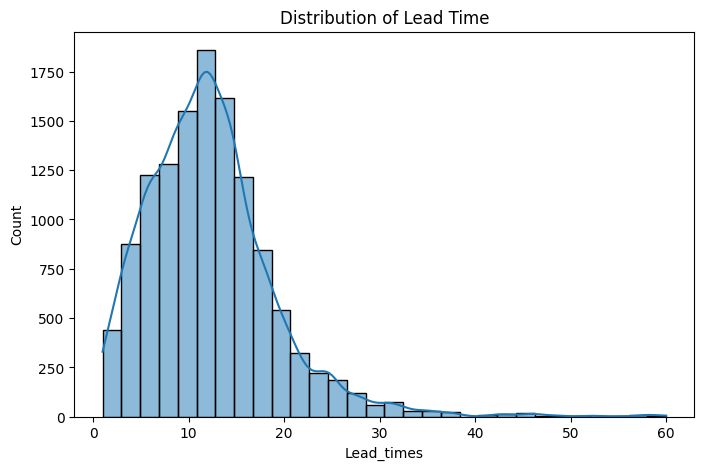

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


# lead time distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Lead_times'],bins=30,kde=True)
plt.title("Distribution of Lead Time")
plt.show()

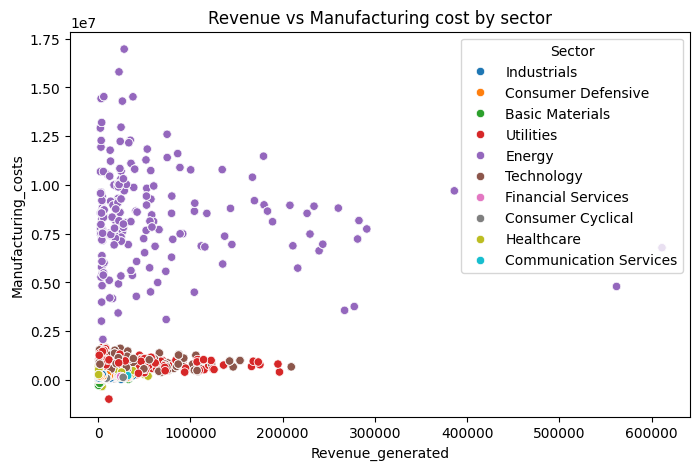

In [13]:
#   Revenue and Cost scatter
df['Revenue_generated'] = pd.to_numeric(df['Revenue_generated'],errors='coerce')

plt.figure(figsize=(8,5))
sns.scatterplot(x='Revenue_generated',y='Manufacturing_costs',hue="Sector",data=df)
plt.title("Revenue vs Manufacturing cost by sector")
plt.show()

- Energy sector dominate in both revenue and manufacturing cost (very high cost for many suppliers)
- cost inefficiency(Energy)

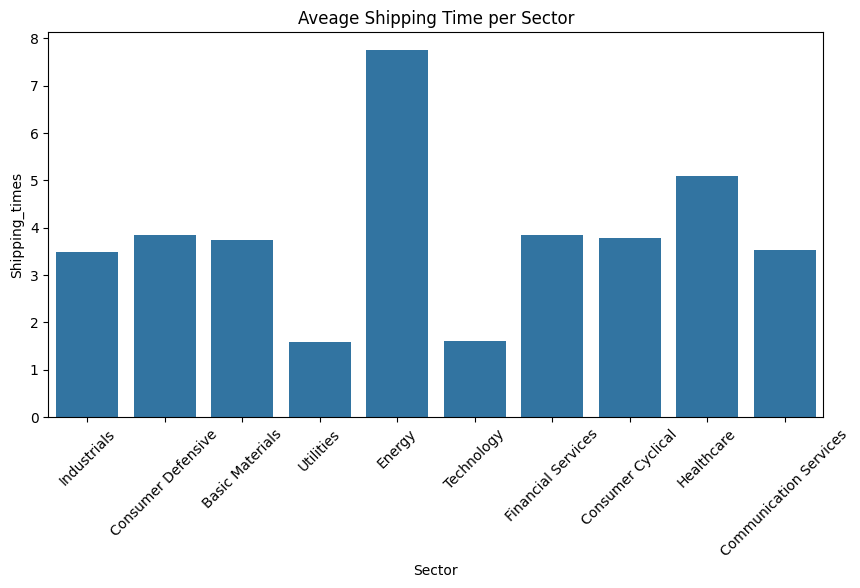

In [14]:
# Sector wise average shipping time

plt.figure(figsize=(10,5))
sns.barplot(data=df,x="Sector",y="Shipping_times",errorbar=None)
plt.title("Aveage Shipping Time per Sector")
plt.xticks(rotation = 45)
plt.show()

- Energy sector has highest average shipping time (approx 8 days) and health care has second highest
- Utilities and Technology sector has lowest shipping times 

- Energy suppliers are the riskiest in terms of logistics
- utilities/Technology are operationaly effiecient in logistics
- logistic inefficiency(Energy and Healthcare)

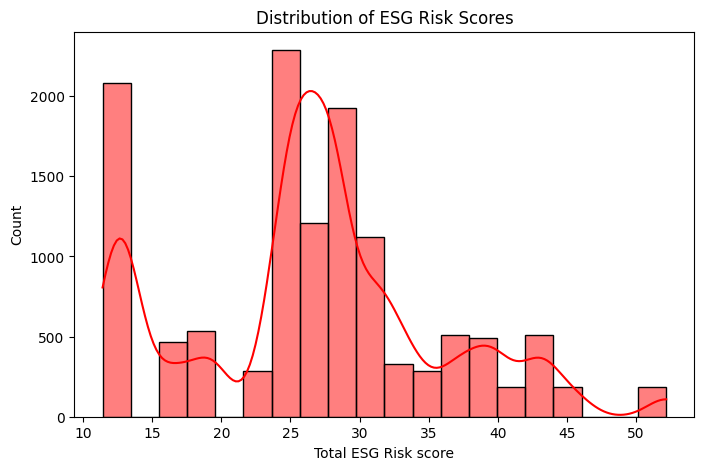

In [15]:
# ESG Risk Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Total ESG Risk score'],bins=20,kde=True,color="red")
plt.title("Distribution of ESG Risk Scores")
plt.show()

- Most companies are int the moderate ESG risk zone, but a handful face high ESG risk(>40) that 
could impact long-term sustainability

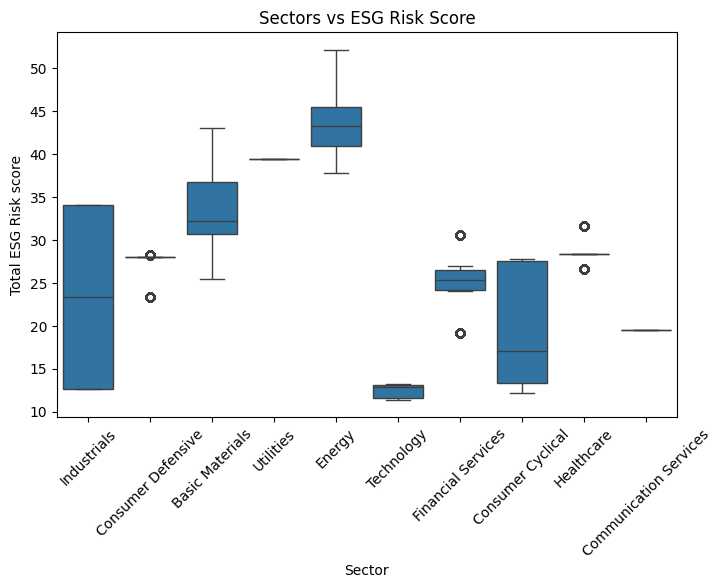

In [16]:
# sector vs esg score
plt.figure(figsize=(8,5))
sns.boxplot(x='Sector',y='Total ESG Risk score',data=df)
plt.title('Sectors vs ESG Risk Score')
plt.xticks(rotation=45)
plt.show()

- Energy sector is the riskiest from an ESG perspective → more prone to regulatory fines or sustainability-driven revenue leakage.

- Technology sector has the best ESG profile → likely more resilient to compliance risks.

- Wide spread in Industrials shows inconsistency → some firms perform very well, others lag behind.

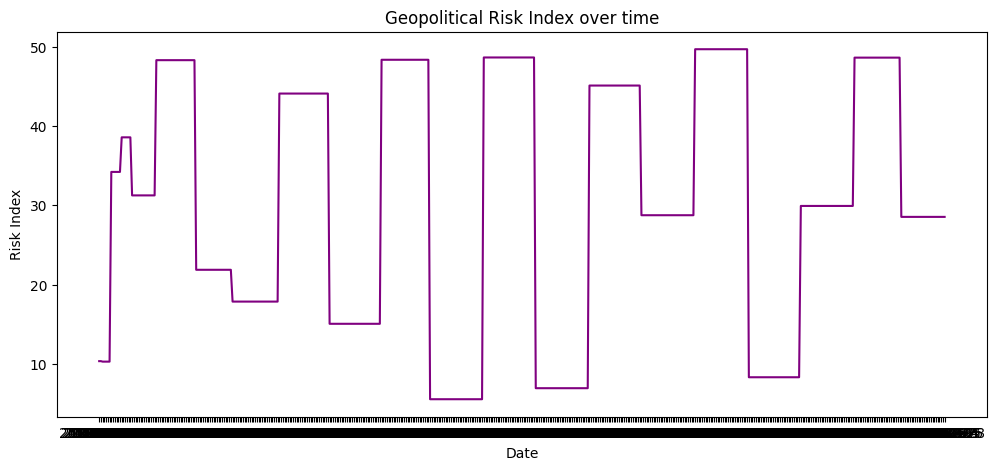

In [17]:
# Geopolitical Analysis
plt.figure(figsize=(12,5))
plt.plot(df['Date'],df['GPR_Index'],color='purple')
plt.title("Geopolitical Risk Index over time")
plt.xlabel("Date")
plt.ylabel("Risk Index")
plt.show()

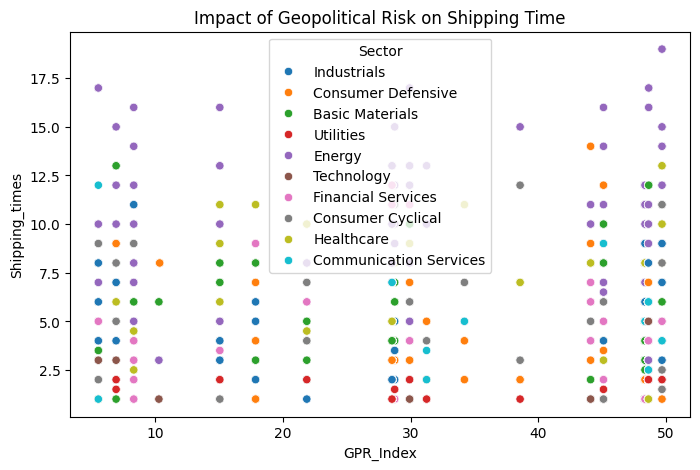

In [18]:
# Compare geopolitical risk vs shipping time
plt.figure(figsize=(8,5))
sns.scatterplot(x="GPR_Index", y="Shipping_times", hue="Sector", data=df)
plt.title("Impact of Geopolitical Risk on Shipping Time")
plt.show()


In [24]:
numeric_cols = df.select_dtypes(include=['float64','int64'])
numeric_cols.corr()


,Price,Availability_Pct,Number_of_products_sold,Revenue_generated,Stock_levels,Lead_times,Shipping_times,Shipping_costs,Manufacturing_lead_time,Manufacturing_costs,...,Profit_margin,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score,E_S_Avg,Governance_Impact,ESG_Risk_Level_Encoded,GPR_Index
Price,1.000000,-0.022565,0.383110,0.505282,0.365121,0.295769,0.224655,0.111837,0.303913,0.882665,...,-0.208115,0.361647,0.561566,-0.268899,0.065466,0.129112,0.483064,-0.371085,-0.009418,0.013633
Availability_Pct,-0.022565,1.000000,0.071556,-0.168461,0.161569,0.021418,0.003750,0.038045,0.015924,0.021375,...,-0.085836,0.026508,0.028947,0.006803,0.005275,-0.013778,0.025634,-0.026253,0.018562,-0.003109
Number_of_products_sold,0.383110,0.071556,1.000000,0.163942,0.436175,0.319898,0.216860,0.157089,0.322854,0.532196,...,-0.223333,0.308394,0.345021,-0.009975,0.133027,0.056220,0.333531,-0.244392,0.067406,-0.006847
Revenue_generated,0.505282,-0.168461,0.163942,1.000000,0.143374,0.142208,0.104995,0.010084,0.149372,0.399601,...,0.165692,0.171855,0.274204,-0.142217,0.029772,0.068640,0.235020,-0.183498,-0.007213,-0.031336
Stock_levels,0.365121,0.161569,0.436175,0.143374,1.000000,0.314599,0.261352,0.127966,0.319005,0.497608,...,-0.212380,0.283286,0.329257,-0.024015,0.108674,0.046174,0.311212,-0.233286,0.068046,-0.006169
Lead_times,0.295769,0.021418,0.319898,0.142208,0.314599,1.000000,0.627284,0.179175,0.856393,0.458342,...,-0.174072,0.389853,0.338898,0.093629,0.271874,0.086419,0.384027,-0.268424,0.095329,0.001619
Shipping_times,0.224655,0.003750,0.216860,0.104995,0.261352,0.627284,1.000000,0.151353,0.643083,0.342385,...,-0.130016,0.293862,0.262531,0.064408,0.195386,0.055435,0.291430,-0.206205,0.072262,0.022841
Shipping_costs,0.111837,0.038045,0.157089,0.010084,0.127966,0.179175,0.151353,1.000000,0.182607,0.201086,...,-0.095743,0.167962,0.151596,0.042060,0.105615,0.039922,0.165413,-0.117351,0.055344,-0.014779
Manufacturing_lead_time,0.303913,0.015924,0.322854,0.149372,0.319005,0.856393,0.643083,0.182607,1.000000,0.463242,...,-0.187253,0.397930,0.340427,0.108362,0.279203,0.093042,0.388214,-0.262800,0.094901,0.015439
Manufacturing_costs,0.882665,0.021375,0.532196,0.399601,0.497608,0.458342,0.342385,0.201086,0.463242,1.000000,...,-0.305512,0.475227,0.618820,-0.156621,0.152247,0.118444,0.564205,-0.421337,0.056783,0.012443


In [26]:
df.columns.tolist()

['Date',
 'Supplier_ID',
 'Supplier_Name',
 'Sector',
 'SKU',
 'Product_Type',
 'Price',
 'Availability',
 'Availability_Pct',
 'Number_of_products_sold',
 'Revenue_generated',
 'Customer_demographics',
 'Stock_levels',
 'Lead_times',
 'Order_quantities',
 'Shipping_times',
 'Shipping_carriers',
 'Shipping_costs',
 'Location',
 'Manufacturing_lead_time',
 'Production_volumes',
 'Manufacturing_costs',
 'Defect_rates_pct',
 'Transportation_modes',
 'Routes',
 'Delivery_Reliabiliy',
 'OnTime_Flag',
 'Cost_per_unit',
 'Revenue_per_unit',
 'Stockout_Risk',
 'Inspection_failure_flag',
 'Profit_margin',
 'Symbol',
 'Name',
 'Industry',
 'Total ESG Risk score',
 'Environment Risk Score',
 'Governance Risk Score',
 'Social Risk Score',
 'Controversy Level',
 'Controversy Score',
 'ESG Risk Percentile',
 'ESG Risk Level',
 'E_S_Avg',
 'Governance_Impact',
 'ESG_Risk_Level_Encoded',
 'GPR_Index']

In [28]:
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
for col in numeric_cols:
    df[col] = df.groupby('Sector')[col].transform(lambda x:x.fillna(x.median()))

In [ ]:
features = [
    'Lead_times', 'Shipping_times', 'Stock_levels', 'Delivery_Reliabiliy',
    'Cost_per_unit', 'Manufacturing_costs',
    'Total ESG Risk score', 'Governance Risk Score', 'Controversy Score', 
    'ESG_Risk_Level_Encoded', 'GPR_Index'
]

In [42]:
df.to_csv(r'C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\cleaned_data\features_model.csv')

,Supplier_ID,Supplier_Name,Stock_levels,Lead_times,Shipping_times,Manufacturing_costs,Delivery_Reliabiliy,OnTime_Flag,Cost_per_unit,Revenue_per_unit,Stockout_Risk,Inspection_failure_flag,Total ESG Risk score,Governance Risk Score,Controversy Score,ESG Risk Level,ESG_Risk_Level_Encoded,GPR_Index
0,S0043,SUPP_I_043,2937.0,19.0,8.0,207056.53,2.375,1,14.116207,13.7267,0.0,0,12.6,5.6,4.0,Low,1.0,10.35
1,S0043,SUPP_I_043,2937.0,19.0,8.0,207056.53,2.375,1,14.116207,13.7267,0.0,0,34.1,15.8,2.0,High,3.0,10.35
2,S0224,SUPP_CD_224,2370.0,14.0,8.0,114319.67,1.750,1,17.294958,27.1266,0.0,0,28.0,6.2,2.0,Unknown,0.0,10.35
3,S0224,SUPP_CD_224,2370.0,14.0,8.0,114319.67,1.750,1,17.294958,27.1266,0.0,0,28.0,6.2,2.0,Unknown,0.0,10.35
4,S0224,SUPP_CD_224,2370.0,14.0,8.0,114319.67,1.750,1,17.294958,27.1266,0.0,0,23.4,6.2,2.0,Medium,2.0,10.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12580,S0261,SUPP_H_261,1192.0,17.0,5.0,273407.01,3.400,1,28.308864,42.0920,0.0,0,28.4,10.3,3.0,Unknown,0.0,28.54
12581,S0261,SUPP_H_261,1192.0,17.0,5.0,273407.01,3.400,1,28.308864,42.0920,0.0,0,31.6,12.1,3.0,High,3.0,28.54
12582,S0082,SUPP_U_082,1038.0,3.0,1.0,1265259.10,3.000,1,109.688695,109.6720,0.0,0,39.4,8.3,4.0,Unknown,0.0,28.54
12583,S0082,SUPP_U_082,1038.0,3.0,1.0,1265259.10,3.000,1,109.688695,109.6720,0.0,0,39.4,8.3,4.0,High,3.0,28.54
